In [25]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('Pep_Kloop_Analysis_June23.csv')

In [26]:
# Replace empty rows in the 'Notes' column with "No European Competition"
data['Notes'].fillna("No European Competition", inplace=True)

# Verify the changes
print(data['Notes'])

0      Champions League via league finish
1      Champions League via league finish
2      Champions League via league finish
3      Champions League via league finish
4             Europa League via cup win 1
                      ...                
135               No European Competition
136               No European Competition
137                             Relegated
138                             Relegated
139                             Relegated
Name: Notes, Length: 140, dtype: object


In [27]:
# Filter data for Manchester City and Liverpool
man_city_data = data[data['Team'] == 'Manchester City']
liverpool_data = data[data['Team'] == 'Liverpool']

In [28]:
# Calculate total wins, losses, goals, and points for each team
man_city_total_wins = man_city_data['W'].sum()
man_city_total_losses = man_city_data['L'].sum()
man_city_total_goals = man_city_data['GF'].sum()
man_city_total_points = man_city_data['Pts'].sum()

liverpool_total_wins = liverpool_data['W'].sum()
liverpool_total_losses = liverpool_data['L'].sum()
liverpool_total_goals = liverpool_data['GF'].sum()
liverpool_total_points = liverpool_data['Pts'].sum()


In [29]:
# Print the comparison of key performance metrics
print("Performance Comparison:")
print("----------------------------")
print("Manchester City:")
print("Total Wins:", man_city_total_wins)
print("Total Losses:", man_city_total_losses)
print("Total Goals:", man_city_total_goals)
print("Total Points:", man_city_total_points)
print()
print("Liverpool:")
print("Total Wins:", liverpool_total_wins)
print("Total Losses:", liverpool_total_losses)
print("Total Goals:", liverpool_total_goals)
print("Total Points:", liverpool_total_points)

Performance Comparison:
----------------------------
Manchester City:
Total Wins: 197
Total Losses: 35
Total Goals: 659
Total Points: 625

Liverpool:
Total Wins: 172
Total Losses: 35
Total Goals: 573
Total Points: 575


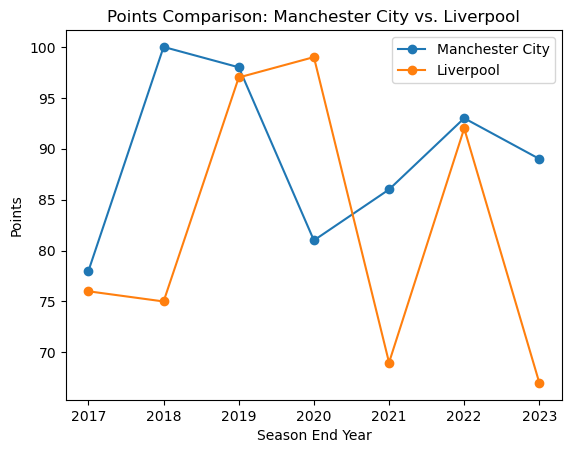

In [30]:
# Visualize the performances of Manchester City and Liverpool over the seasons
seasons = data['Season_End_Year'].unique()
man_city_points = man_city_data.groupby('Season_End_Year')['Pts'].sum()
liverpool_points = liverpool_data.groupby('Season_End_Year')['Pts'].sum()

plt.plot(seasons, man_city_points, marker='o', label='Manchester City')
plt.plot(seasons, liverpool_points, marker='o', label='Liverpool')
plt.xlabel('Season End Year')
plt.ylabel('Points')
plt.title('Points Comparison: Manchester City vs. Liverpool')
plt.legend()
plt.show()

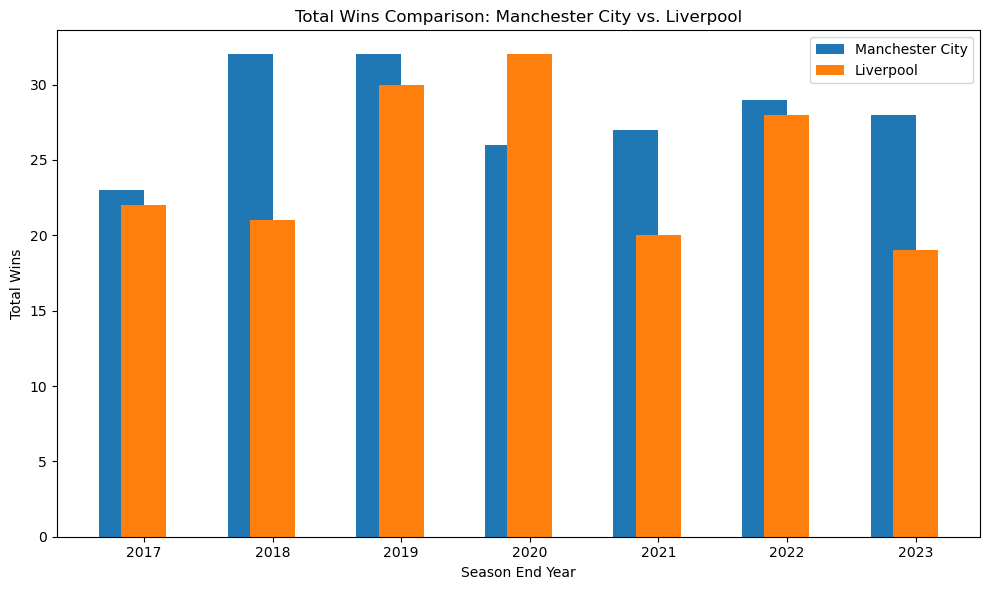

In [31]:


# Calculate total wins for each team in each season
man_city_wins_season = man_city_data.groupby('Season_End_Year')['W'].sum()
liverpool_wins_season = liverpool_data.groupby('Season_End_Year')['W'].sum()

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

# Generate positions for the bars
bar_positions_man_city = np.arange(len(seasons))
bar_positions_liverpool = bar_positions_man_city + bar_width/2

# Plot bar chart comparing total wins
plt.bar(bar_positions_man_city, man_city_wins_season, width=bar_width, label='Manchester City')
plt.bar(bar_positions_liverpool, liverpool_wins_season, width=bar_width, label='Liverpool')

plt.xlabel('Season End Year')
plt.ylabel('Total Wins')
plt.title('Total Wins Comparison: Manchester City vs. Liverpool')
plt.xticks(bar_positions_man_city + bar_width/2, seasons)
plt.legend()
plt.tight_layout()
plt.show()


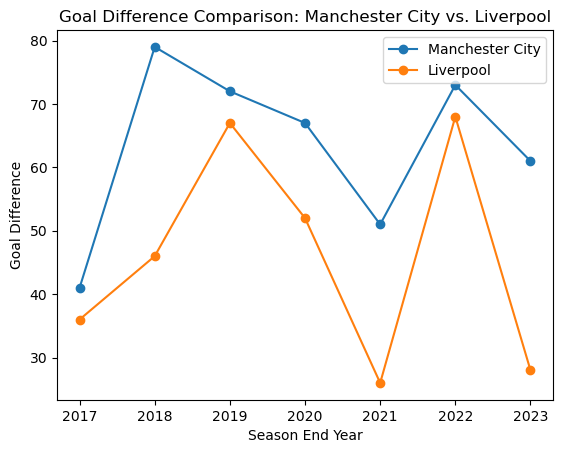

In [32]:
# Calculate goal difference for each team in each season
man_city_goal_diff = man_city_data.groupby('Season_End_Year')['GD'].sum()
liverpool_goal_diff = liverpool_data.groupby('Season_End_Year')['GD'].sum()

# Plot line chart comparing goal difference
plt.plot(seasons, man_city_goal_diff, marker='o', label='Manchester City')
plt.plot(seasons, liverpool_goal_diff, marker='o', label='Liverpool')
plt.xlabel('Season End Year')
plt.ylabel('Goal Difference')
plt.title('Goal Difference Comparison: Manchester City vs. Liverpool')
plt.legend()
plt.show()


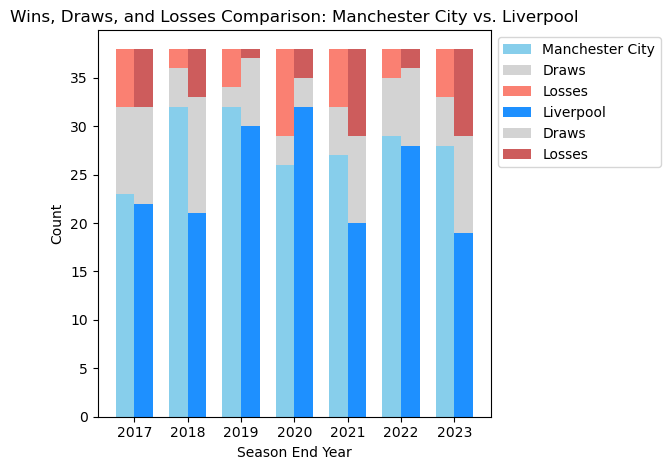

In [33]:
# Calculate total wins, draws, and losses for each team in each season
man_city_wins = man_city_data.groupby('Season_End_Year')['W'].sum()
man_city_draws = man_city_data.groupby('Season_End_Year')['D'].sum()
man_city_losses = man_city_data.groupby('Season_End_Year')['L'].sum()

liverpool_wins = liverpool_data.groupby('Season_End_Year')['W'].sum()
liverpool_draws = liverpool_data.groupby('Season_End_Year')['D'].sum()
liverpool_losses = liverpool_data.groupby('Season_End_Year')['L'].sum()

# Generate positions for the bars
bar_positions = np.arange(len(seasons))

# Set the width of the bars
bar_width = 0.35

# Plot stacked bar chart comparing wins, draws, and losses
plt.bar(bar_positions, man_city_wins, width=bar_width, label='Manchester City', color='skyblue')
plt.bar(bar_positions, man_city_draws, width=bar_width, bottom=man_city_wins, label='Draws', color='lightgray')
plt.bar(bar_positions, man_city_losses, width=bar_width, bottom=man_city_wins + man_city_draws, label='Losses', color='salmon')

plt.bar(bar_positions + bar_width, liverpool_wins, width=bar_width, label='Liverpool', color='dodgerblue')
plt.bar(bar_positions + bar_width, liverpool_draws, width=bar_width, bottom=liverpool_wins, label='Draws', color='lightgray')
plt.bar(bar_positions + bar_width, liverpool_losses, width=bar_width, bottom=liverpool_wins + liverpool_draws, label='Losses', color='indianred')

plt.xlabel('Season End Year')
plt.ylabel('Count')
plt.title('Wins, Draws, and Losses Comparison: Manchester City vs. Liverpool')
plt.xticks(bar_positions + bar_width / 2, seasons)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout()
plt.show()


In [34]:
man_city_win_percentage = man_city_total_wins / man_city_data['MP'].sum() * 100
liverpool_win_percentage = liverpool_total_wins / liverpool_data['MP'].sum() * 100

print("Win Percentage:")
print("Manchester City:", man_city_win_percentage, "%")
print("Liverpool:", liverpool_win_percentage, "%")


Win Percentage:
Manchester City: 74.06015037593986 %
Liverpool: 64.66165413533834 %


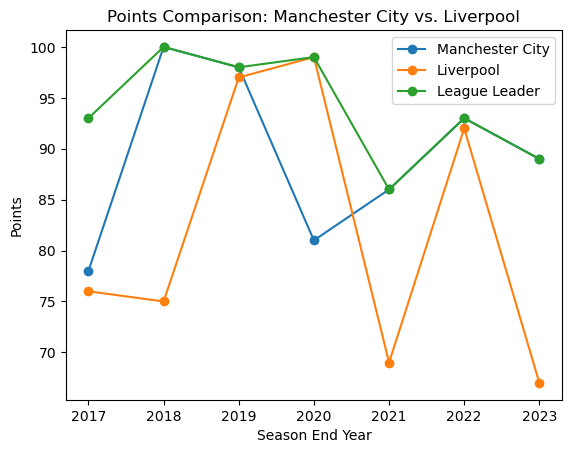

In [35]:
# Find the team that finished as the league leader in each season
league_leaders = data[data['Pos'] == 1]

# Calculate the points of the league leaders in each season
league_leaders_points = league_leaders.groupby('Season_End_Year')['Pts'].sum()

# Plot the points comparison
plt.plot(seasons, man_city_points, marker='o', label='Manchester City')
plt.plot(seasons, liverpool_points, marker='o', label='Liverpool')
plt.plot(seasons, league_leaders_points, marker='o', label='League Leader')
plt.xlabel('Season End Year')
plt.ylabel('Points')
plt.title('Points Comparison: Manchester City vs. Liverpool')
plt.legend()
plt.show()


In [36]:
# Load the dataset
data = pd.read_csv('premier-league-matches.csv')

# Filter matches where Manchester City played against Liverpool
man_city_vs_liverpool = data[((data['Home'] == 'Manchester City') & (data['Away'] == 'Liverpool')) |
                             ((data['Home'] == 'Liverpool') & (data['Away'] == 'Manchester City'))]

# Calculate the number of wins for each coach
man_city_wins_pep_home = len(man_city_vs_liverpool[(man_city_vs_liverpool['Home'] == 'Manchester City') & (man_city_vs_liverpool['FTR'] == 'H')])
man_city_wins_pep_away = len(man_city_vs_liverpool[(man_city_vs_liverpool['Away'] == 'Manchester City') & (man_city_vs_liverpool['FTR'] == 'A')])

liverpool_wins_kloop_away = len(man_city_vs_liverpool[(man_city_vs_liverpool['Away'] == 'Liverpool') & (man_city_vs_liverpool['FTR'] == 'A')])
liverpool_wins_klopp_home = len(man_city_vs_liverpool[(man_city_vs_liverpool['Home'] == 'Liverpool') & (man_city_vs_liverpool['FTR'] == 'H')])

pep_wins = man_city_wins_pep_home + man_city_wins_pep_away
kloop_wins = liverpool_wins_kloop_away + liverpool_wins_klopp_home  

win_percentage_pep = pep_wins / len(man_city_vs_liverpool) * 100
win_percentage_klopp = kloop_wins / len(man_city_vs_liverpool) * 100

# Print the results
print("Wins and Win Percentage - Pep Guardiola vs. Jurgen Klopp")
print("-------------------------------------------------------")
print("Manchester City - Pep Guardiola")
print("Wins against Liverpool:", pep_wins)
print("Win Percentage against Liverpool:", round(win_percentage_pep,2), "%")
print()
print("Liverpool - Jurgen Klopp")
print("Wins against Man City:", kloop_wins)
print("Win Percentage against Man City:", round(win_percentage_klopp,2), "%")

Wins and Win Percentage - Pep Guardiola vs. Jurgen Klopp
-------------------------------------------------------
Manchester City - Pep Guardiola
Wins against Liverpool: 5
Win Percentage against Liverpool: 35.71 %

Liverpool - Jurgen Klopp
Wins against Man City: 4
Win Percentage against Man City: 28.57 %


In [37]:
# Filter matches where Manchester City played as the home team
man_city_home_matches = data[data['Home'] == 'Manchester City']
man_city_away_matches = data[data['Away'] == 'Manchester City']

# Calculate the number of wins for each away team against Manchester City
away_teams_wins = man_city_home_matches[man_city_home_matches['FTR'] == 'A']['Away'].value_counts()
home_teams_wins = man_city_away_matches[man_city_away_matches['FTR'] == 'H']['Home'].value_counts()

# Get the team with the most wins against Manchester City
team_with_most_away_wins = away_teams_wins.idxmax()
team_with_most_home_wins = home_teams_wins.idxmax()

all_teams_wins = away_teams_wins.add(home_teams_wins, fill_value=0)

team_with_most_wins = all_teams_wins.idxmax()
most_wins_count = all_teams_wins.max()

# Print the results
print("Team with the most wins against Manchester City (Pep Guardiola):")
print("-------------------------------------------------------------")
print("Team:", team_with_most_wins)
print("Number of Wins:", most_wins_count)

Team with the most wins against Manchester City (Pep Guardiola):
-------------------------------------------------------------
Team: Tottenham
Number of Wins: 6.0


In [38]:
# Filter matches where Manchester City played as the home team
liverpool_home_matches = data[data['Home'] == 'Liverpool']
liverpool_away_matches = data[data['Away'] == 'Liverpool']

# Calculate the number of wins for each away team against Manchester City
away_teams_wins = liverpool_home_matches[liverpool_home_matches['FTR'] == 'A']['Away'].value_counts()
home_teams_wins = liverpool_away_matches[liverpool_away_matches['FTR'] == 'H']['Home'].value_counts()

# Get the team with the most wins against Manchester City
team_with_most_away_wins = away_teams_wins.idxmax()
team_with_most_home_wins = home_teams_wins.idxmax()

all_teams_wins = away_teams_wins.add(home_teams_wins, fill_value=0)

team_with_most_wins = all_teams_wins.idxmax()
most_wins_count = all_teams_wins.max()

# Print the results
print("Team with the most wins against Liverpool (Jurgen Kloop):")
print("-------------------------------------------------------------")
print("Team:", team_with_most_wins)
print("Number of Wins:", most_wins_count)

Team with the most wins against Liverpool (Jurgen Kloop):
-------------------------------------------------------------
Team: Manchester City
Number of Wins: 5.0


In [39]:

# Filter matches where Manchester City played against Liverpool
man_city_vs_liverpool = data[((data['Home'] == 'Manchester City') & (data['Away'] == 'Liverpool')) |
                             ((data['Home'] == 'Liverpool') & (data['Away'] == 'Manchester City'))]

# Calculate the number of goals scored by each team against each other
man_city_goals = man_city_vs_liverpool.loc[man_city_vs_liverpool['Home'] == 'Manchester City', 'HomeGoals'].sum() + \
                 man_city_vs_liverpool.loc[man_city_vs_liverpool['Away'] == 'Manchester City', 'AwayGoals'].sum()

liverpool_goals = man_city_vs_liverpool.loc[man_city_vs_liverpool['Home'] == 'Liverpool', 'HomeGoals'].sum() + \
                  man_city_vs_liverpool.loc[man_city_vs_liverpool['Away'] == 'Liverpool', 'AwayGoals'].sum()

# Print the results
print("Number of Goals - Manchester City vs. Liverpool:")
print("------------------------------------------------")
print("Manchester City Goals against Liverpool:", man_city_goals)
print("Liverpool Goals against Manchester City:", liverpool_goals)

Number of Goals - Manchester City vs. Liverpool:
------------------------------------------------
Manchester City Goals against Liverpool: 29
Liverpool Goals against Manchester City: 18
